# EDA - stage 1

In [384]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [385]:
df2=pd.read_pickle('df_after_data_prep.pkl')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_seasons   51372 non-null  int64  
 1   number_of_episodes  51372 non-null  int64  
 2   vote_count          51372 non-null  int64  
 3   vote_average        51372 non-null  float64
 4   adult               51372 non-null  bool   
 5   first_air_date      51372 non-null  string 
 6   last_air_date       50938 non-null  string 
 7   popularity          51372 non-null  float64
 8   type                51372 non-null  string 
 9   status              51372 non-null  string 
 10  genres              34485 non-null  string 
 11  languages           36954 non-null  string 
 12  networks            33041 non-null  string 
 13  origin_country      44490 non-null  string 
 14  episode_run_time    51372 non-null  int64  
dtypes: bool(1), float64(2), int64(4), string(8)
memory usage:

Seperating the numeric features to different data frame

In [387]:
df_numeric = df2[['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'popularity', 'episode_run_time']]
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 6 to 168636
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_seasons   51372 non-null  int64  
 1   number_of_episodes  51372 non-null  int64  
 2   vote_count          51372 non-null  int64  
 3   vote_average        51372 non-null  float64
 4   popularity          51372 non-null  float64
 5   episode_run_time    51372 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.7 MB


# Data Protocol

In [389]:
# Type of valaues 
df_numeric.dtypes.to_excel("TV_datatype.xlsx",
             sheet_name='data_type')
# Maximum valaues 
df_numeric.max().to_excel("max_TV.xlsx",
             sheet_name='max')
# Minimum Values
df_numeric.min().to_excel("min_TV.xlsx",
             sheet_name='min')
# Missing Values
df_numeric.isnull().sum(axis=0).to_excel("NA_TV.xlsx",
             sheet_name='NA')
# exporting results to the protocol
df_numeric.nunique().to_excel("unique_TV.xlsx",
             sheet_name='unique')

# Descriptive Statistics

Automated reports

### AutoViz

Shape of your Data Set loaded: (51372, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 17016 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
number_of_seasons,int64,0.000000,0,1.000000,56.000000,Column has 7611 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
number_of_episodes,int64,0.000000,1,0.000000,1480.000000,Column has 3186 outliers greater than upper bound (43.50) or lower than lower bound(-16.50). Cap them or remove them.
vote_count,int64,0.000000,1,0.000000,13053.000000,Column has 5135 outliers greater than upper bound (7.50) or lower than lower bound(-4.50). Cap them or remove them.
vote_average,float64,0.000000,NA,0.000000,10.000000,No issue
popularity,float64,0.000000,NA,0.000000,3065.138000,Column has 4305 outliers greater than upper bound (9.94) or lower than lower bound(-4.48). Cap them or remove them.
episode_run_time,int64,0.000000,0,0.000000,6032.000000,Column has 671 outliers greater than upper bound (112.50) or lower than lower bound(-67.50). Cap them or remove them.


Number of All Scatter Plots = 3


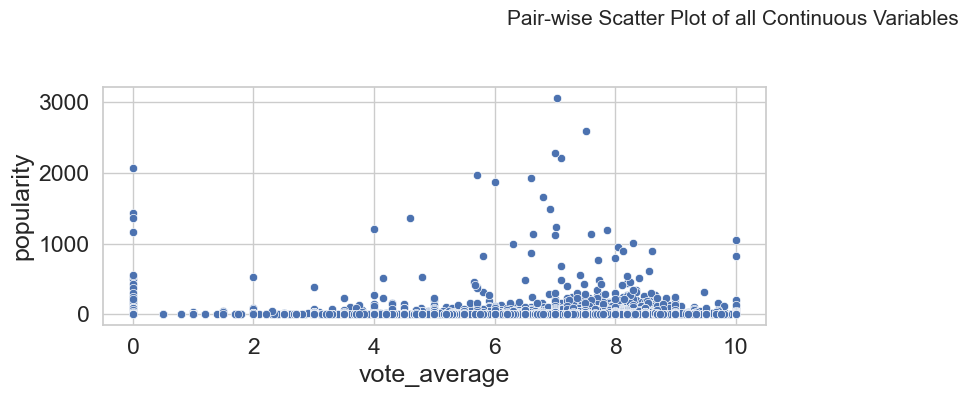

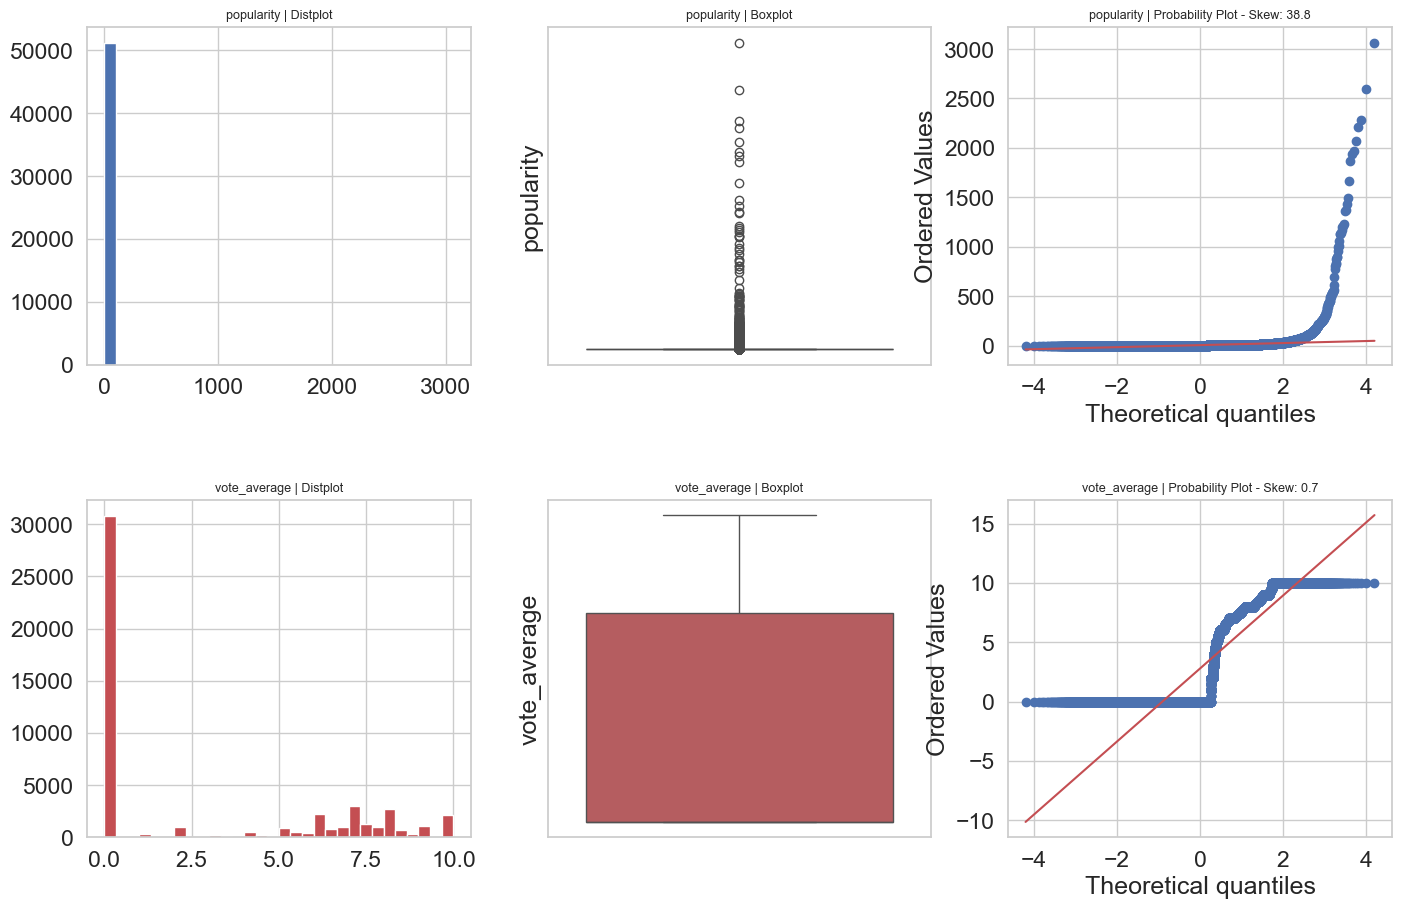

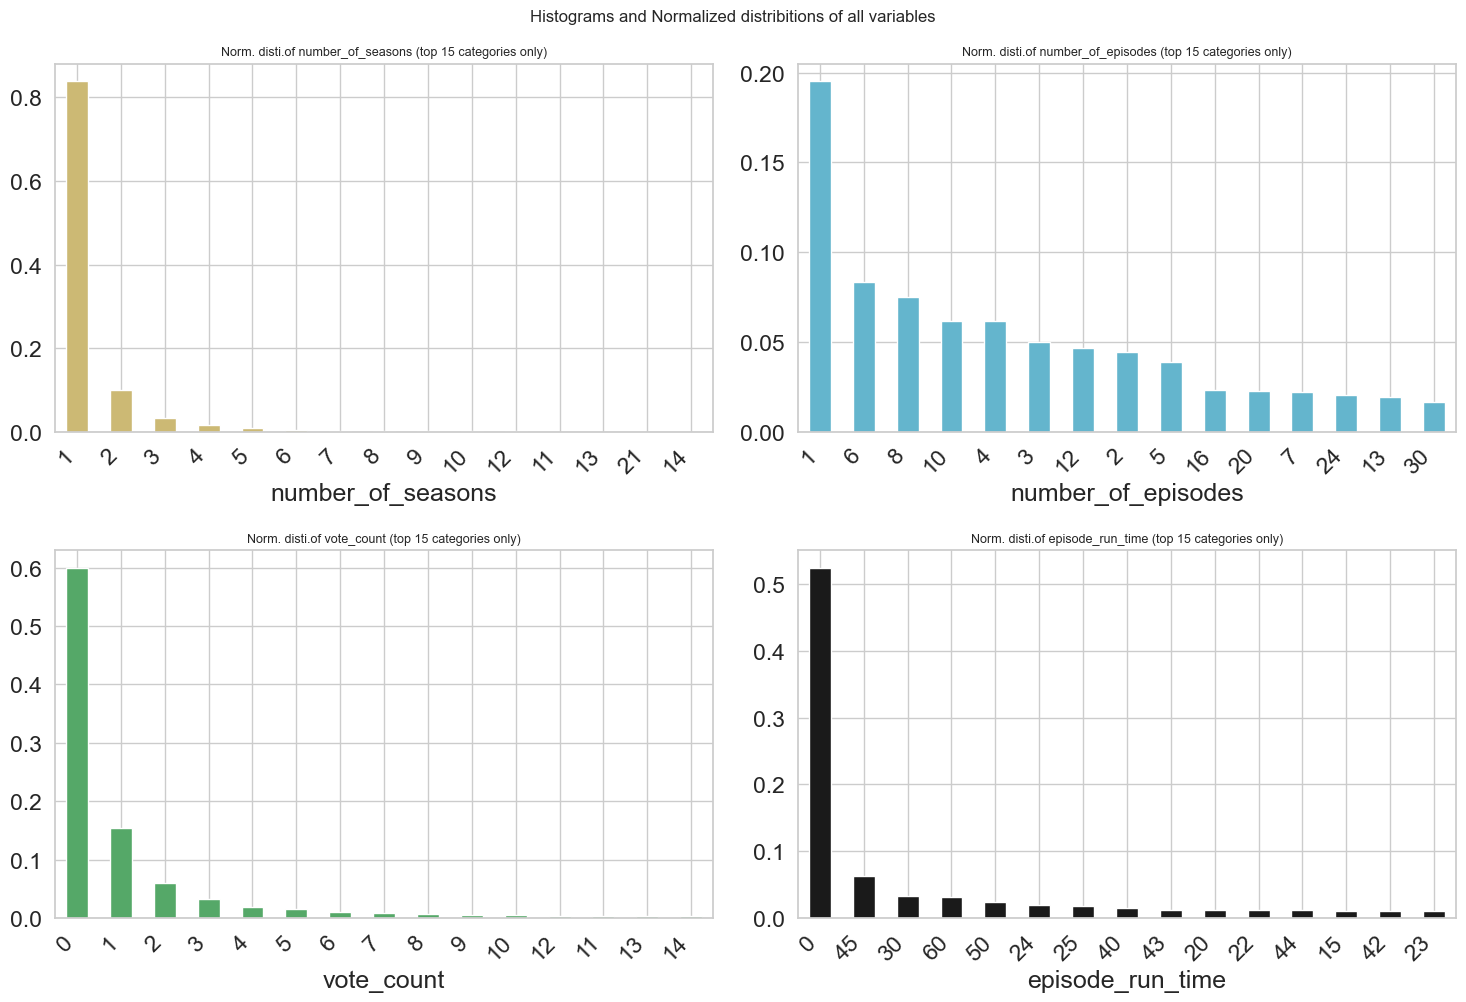

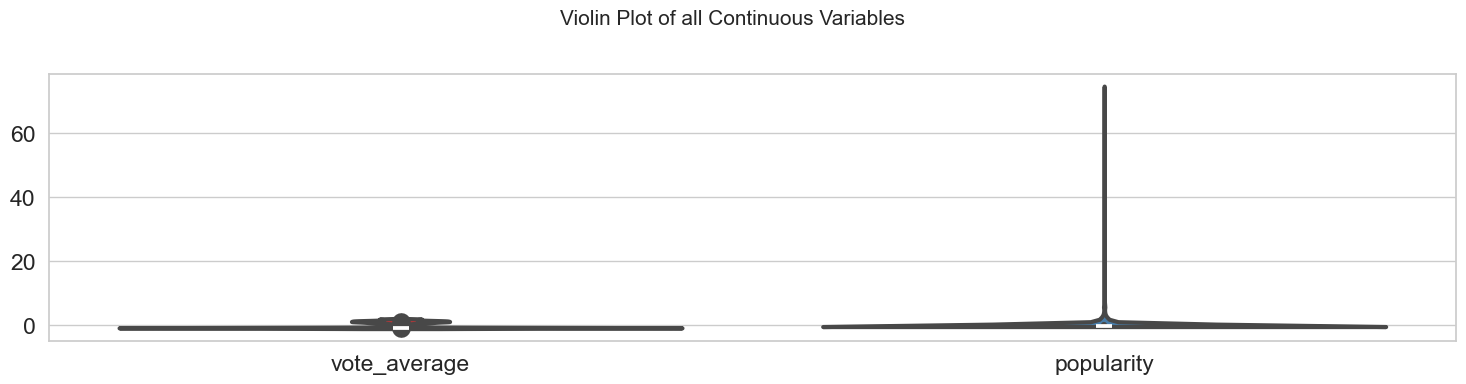

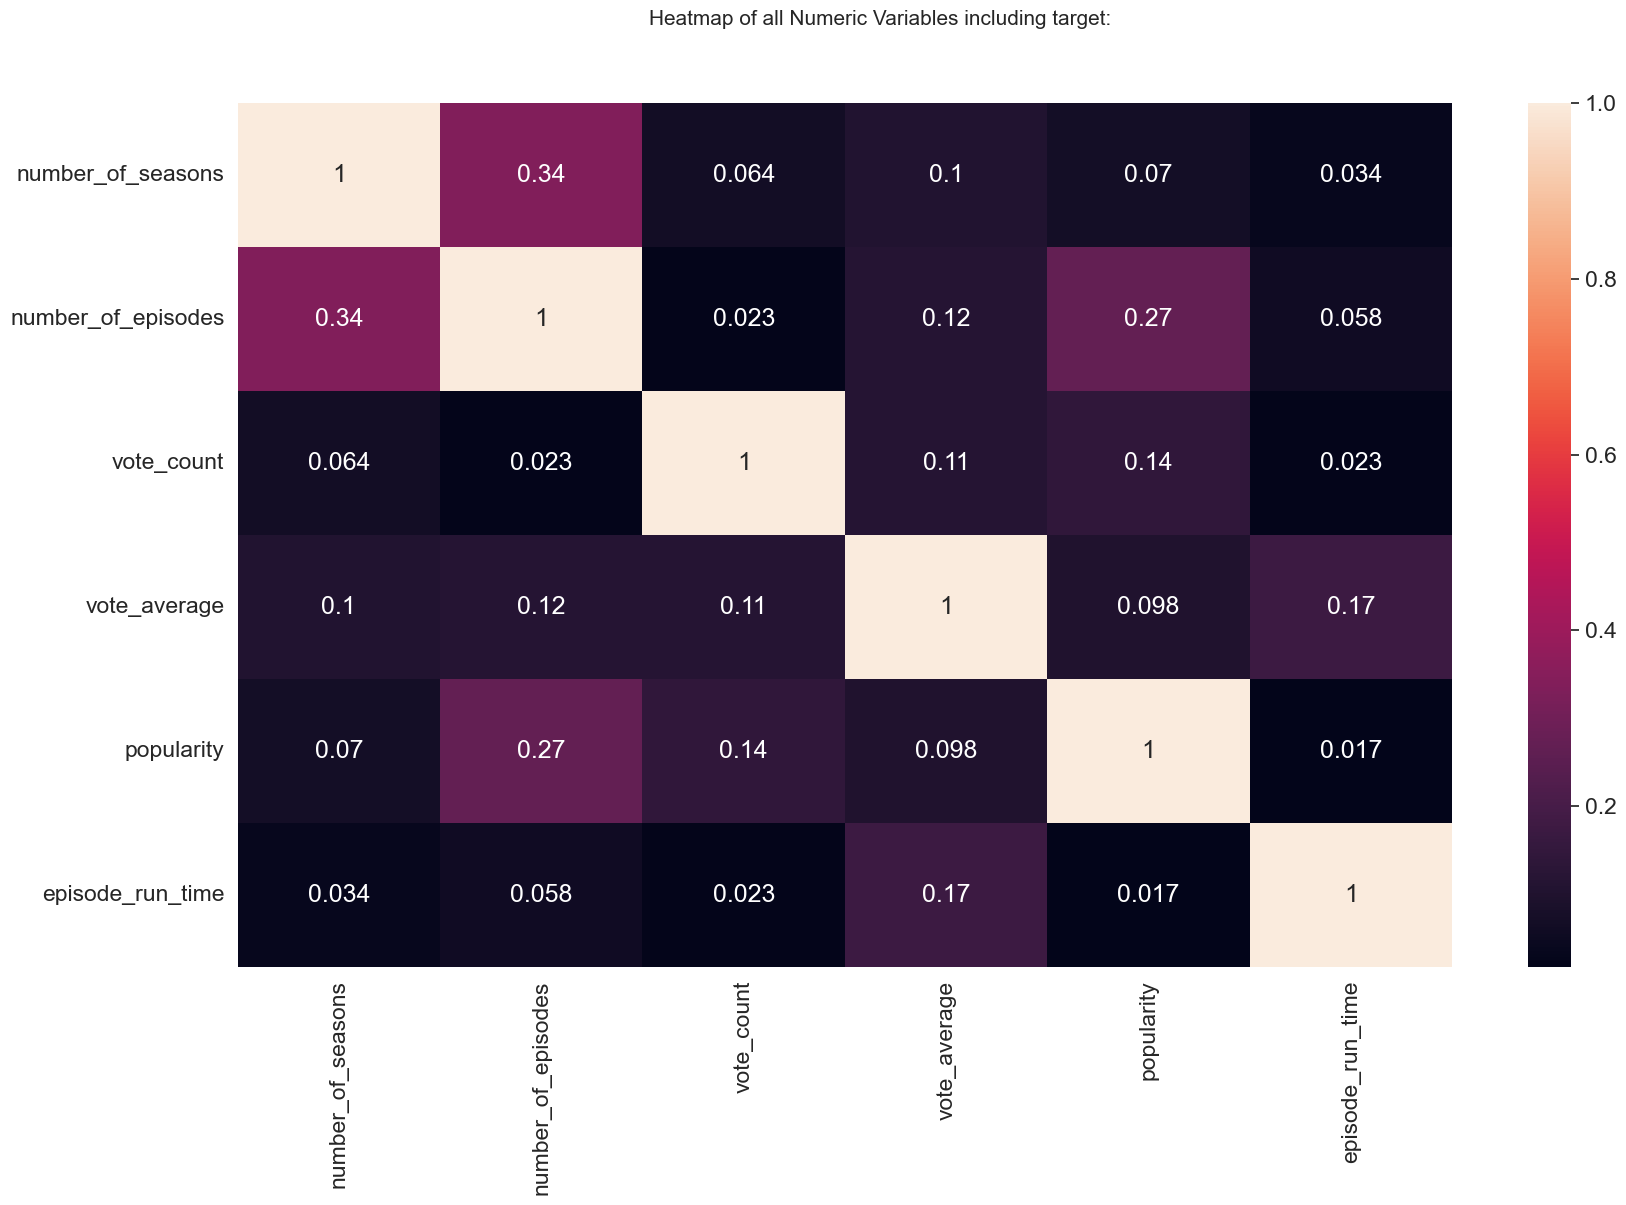

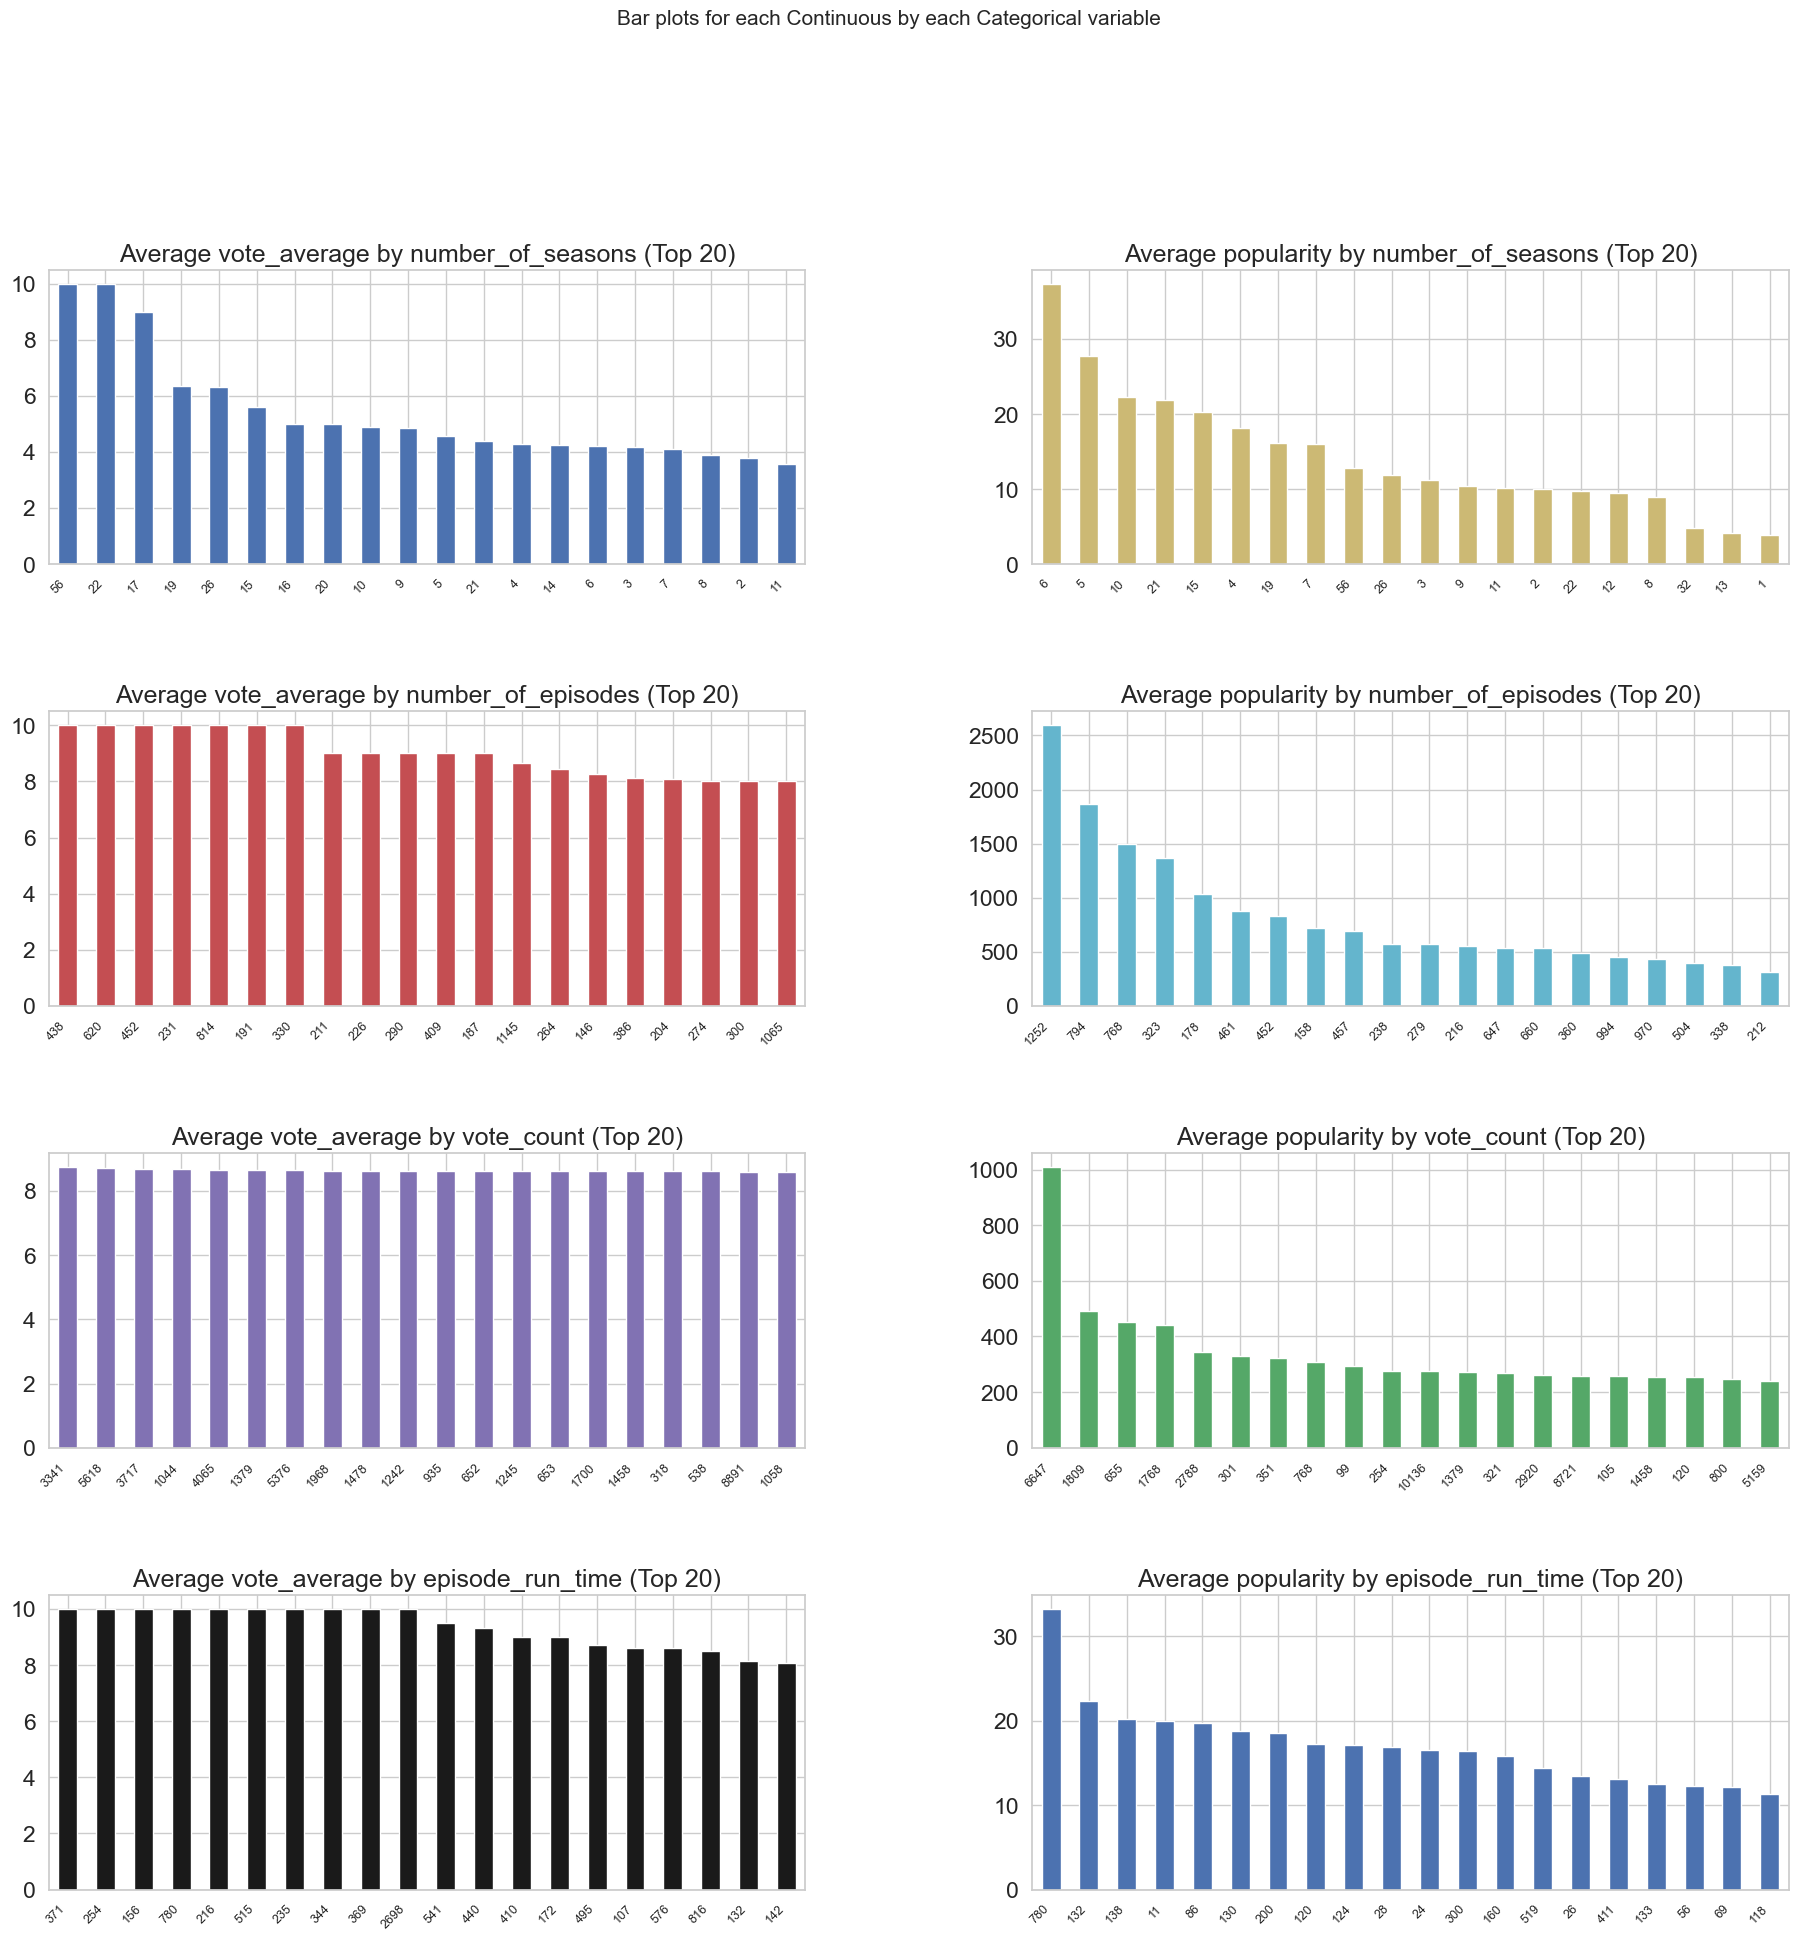

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
0,2,9,13053,7.831,115.587,0
1,1,9,11308,8.300,62.893,0
2,2,12,10136,8.200,276.759,52
3,3,24,9353,8.500,154.480,0
4,2,16,9008,8.353,197.456,60
...,...,...,...,...,...,...
51367,1,1,0,0.000,0.900,0
51368,1,8,0,0.000,0.000,0
51369,1,32,0,0.000,3.710,0
51370,1,8,0,0.000,3.028,0


In [393]:
# Saving number of unique values per column to Excel
df_numeric.nunique().to_excel("unique_TV.xlsx", sheet_name='unique')

# Installing AutoViz if not already installed
!pip install autoviz

# Importing AutoViz
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()

# Saving df_numeric to CSV for AutoViz
df_numeric.to_csv('df_numeric.csv', index=False)

# Running AutoViz on the CSV file
AV.AutoViz('df_numeric.csv')

# Descriptive Statistics

In [395]:
df_numeric.describe()

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,51372.000000,51372.000000,51372.000000,51372.000000,51372.000000,51372.000000
mean,1.294655,15.174414,14.834326,2.782773,5.283645,20.477459
std,1.017960,33.728660,180.168726,3.641913,41.067166,46.022820
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,0.600000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,1.030000,0.000000
75%,1.000000,16.000000,1.000000,6.800000,2.706000,41.000000
max,56.000000,1480.000000,13053.000000,10.000000,3065.138000,6032.000000


# Boolean (categorical-dummy type)

Data type of 'adult' column: category
Unique values in 'adult' column: [False, True]
Categories (2, bool): [False, True]


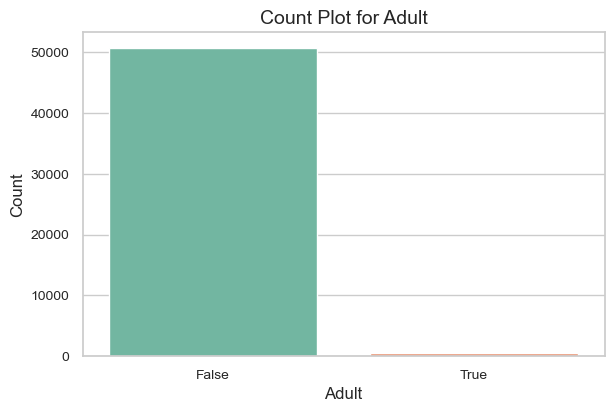

In [397]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Converting 'adult' column to string
df2['adult'] = df2['adult'].astype('category')

print("Data type of 'adult' column:", df2['adult'].dtype)  # Should print 'object'
print("Unique values in 'adult' column:", df2['adult'].unique())  # Should print ['0', '1']

# Plotting the count plot for 'adult' column
plt.figure(figsize=(6, 4))  # Set figure size
sb.countplot(x='adult', data=df2, palette='Set2')  # Create the count plot

# Adding title and labels
plt.title('Count Plot for Adult', fontsize=14)
plt.xlabel('Adult', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customizing font sizes for ticks
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Showing the plot
plt.show()

# Skewness (normaility check)

In [399]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # returning default  
pd.DataFrame(df_numeric.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
episode_run_time,54.011132
popularity,38.844945
vote_count,38.017099
number_of_seasons,14.101025
number_of_episodes,12.561001
vote_average,0.703923


Definetly not a normal distibution - we will need to use IQR (and not z-score) when handling outliers!

# Target Value (regular view - see below log view as part of the numerical features analysis)

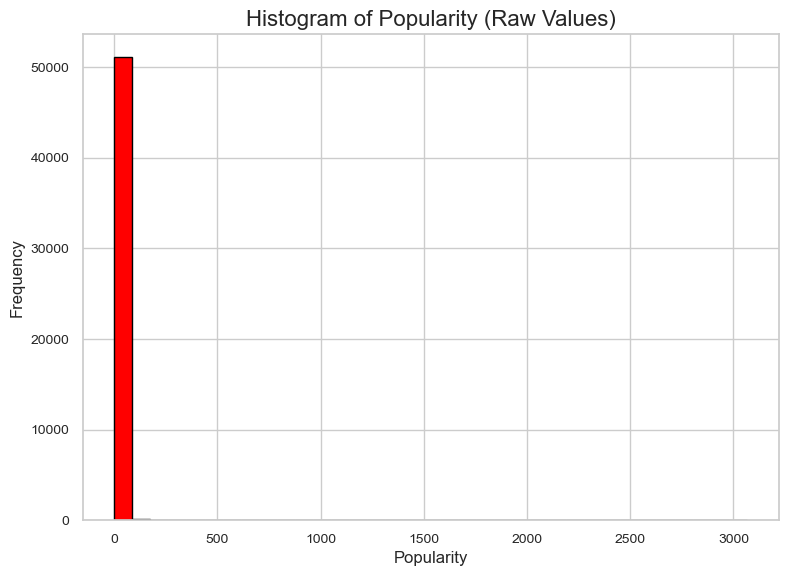

In [402]:
# Plot histogram for 'popularity' without log transformation
plt.figure(figsize=(8, 6))
plt.hist(df_numeric['popularity'], bins=35, color="red", edgecolor="black")  # Red color
plt.title("Histogram of Popularity (Raw Values)", fontsize=16)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

In [403]:
df_numeric.popularity.max()

3065.138

# Histograms for continues features 

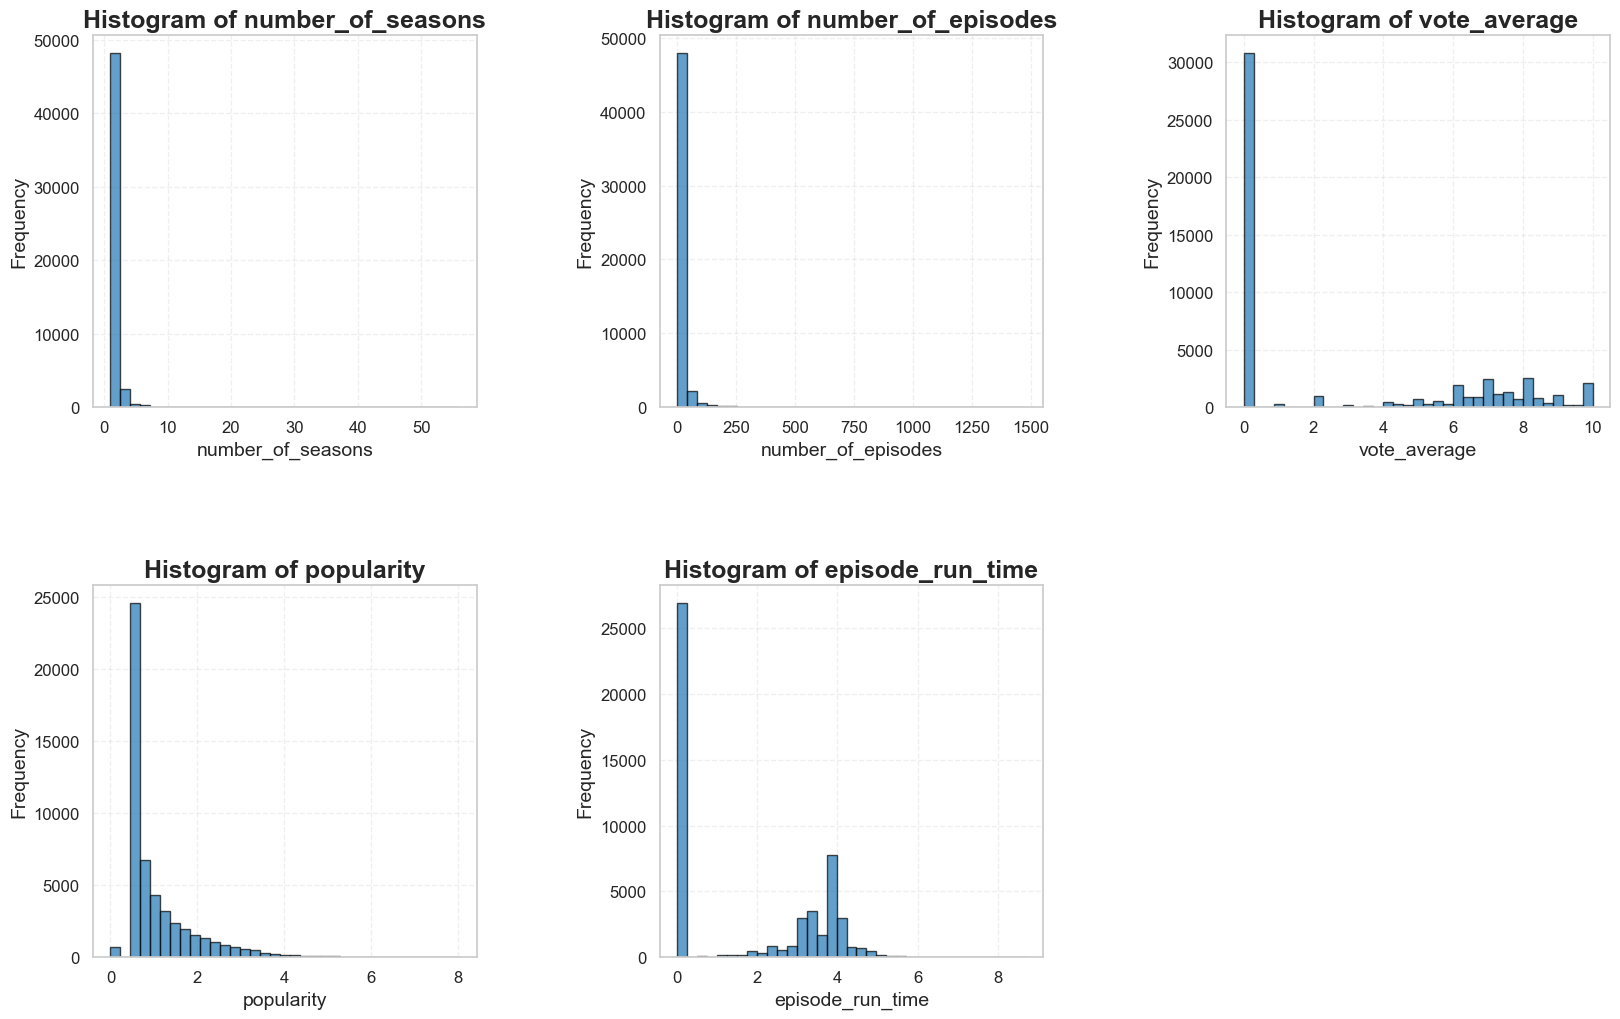

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Applying log transformation only to 'popularity' and 'episode_run_time'
df_numeric['popularity'] = np.log1p(df_numeric['popularity'])
df_numeric['episode_run_time'] = np.log1p(df_numeric['episode_run_time'])

# Columns to plot (excluding 'adult')
columns = ['number_of_seasons', 'number_of_episodes', 'vote_average', 'popularity', 'episode_run_time']

# Determining number of rows and columns for subplots based on the number of columns
n_cols = 3
n_rows = (len(columns) // n_cols) + (1 if len(columns) % n_cols != 0 else 0)

# Plotting histograms for all columns except 'adult'
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 12))

# Flattenning axes array for easier iteration
axes = axes.flatten()

# Customizing the color palette
color = "#1f77b4"  # Nice blue color, feel free to change

# Plotting each column's histogram
for i, col in enumerate(columns):
    ax = axes[i]  # Accessing the appropriate subplot
    df_numeric[col].hist(ax=ax, bins=35, color=color, edgecolor="black", alpha=0.7)
    ax.set_title(f"Histogram of {col}", fontsize=18, fontweight='bold')
    ax.set_xlabel(f"{col}", fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)  # Add subtle gridlines

# Removing any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=4.0)  # Adjusting layout for better spacing
plt.show()

In [406]:
# Reverting the log transformation (applying the inverse of log1p)
df_numeric['popularity'] = np.expm1(df_numeric['popularity'])
df_numeric['episode_run_time'] = np.expm1(df_numeric['episode_run_time'])

# Highlight function for skewness
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    negative = 'background-color: hotpink;'
    
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    else:
        return ''  # Default no color for values in the range -1 to 1

# Correlation

If the distribution was normal we could use the default "Pearson" correlation like this:

In [409]:
correlation_matrix = df_numeric.corr()
correlation_matrix

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
number_of_seasons,1.000000,0.337521,0.063588,0.102947,0.069862,0.033965
number_of_episodes,0.337521,1.000000,0.023010,0.116311,0.268443,0.058417
vote_count,0.063588,0.023010,1.000000,0.113301,0.142029,0.022692
vote_average,0.102947,0.116311,0.113301,1.000000,0.098350,0.173602
popularity,0.069862,0.268443,0.142029,0.098350,1.000000,0.016598
episode_run_time,0.033965,0.058417,0.022692,0.173602,0.016598,1.000000


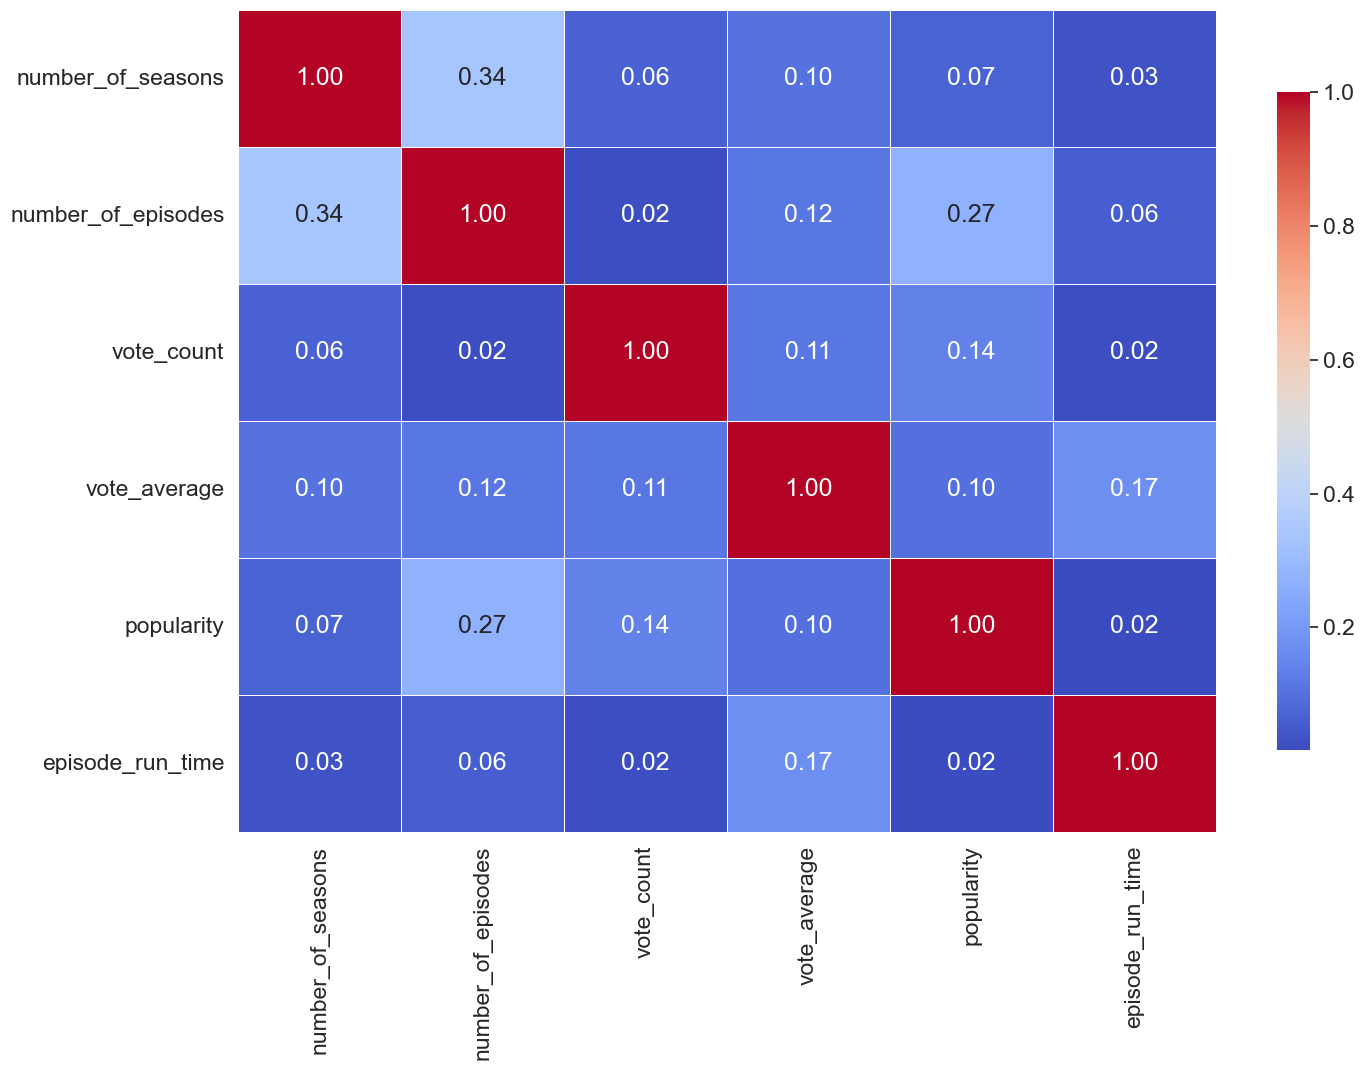

In [410]:
# Setting up the plot for the heatmap with a larger figure
plt.figure(figsize=(18, 14))  # Increased figure size for even more space

# Displaying the heatmap of the correlation matrix
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7, cbar_kws={"shrink": 0.8})

# Improving layout for more spacing
plt.tight_layout(pad=7.0)  # Increased padding for more space between elements

# Showing the plot
plt.show()

However, becasue the distribution in non-normal we should use the "Spearman" method for correlation: 

In [412]:
correlation_matrix_spearman = df_numeric.corr(method='spearman')
correlation_matrix_spearman

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
number_of_seasons,1.000000,0.428930,0.161029,0.144149,0.230124,0.113456
number_of_episodes,0.428930,1.000000,0.311237,0.277814,0.496316,0.228422
vote_count,0.161029,0.311237,1.000000,0.917739,0.588699,0.382619
vote_average,0.144149,0.277814,0.917739,1.000000,0.488643,0.332676
popularity,0.230124,0.496316,0.588699,0.488643,1.000000,0.358978
episode_run_time,0.113456,0.228422,0.382619,0.332676,0.358978,1.000000


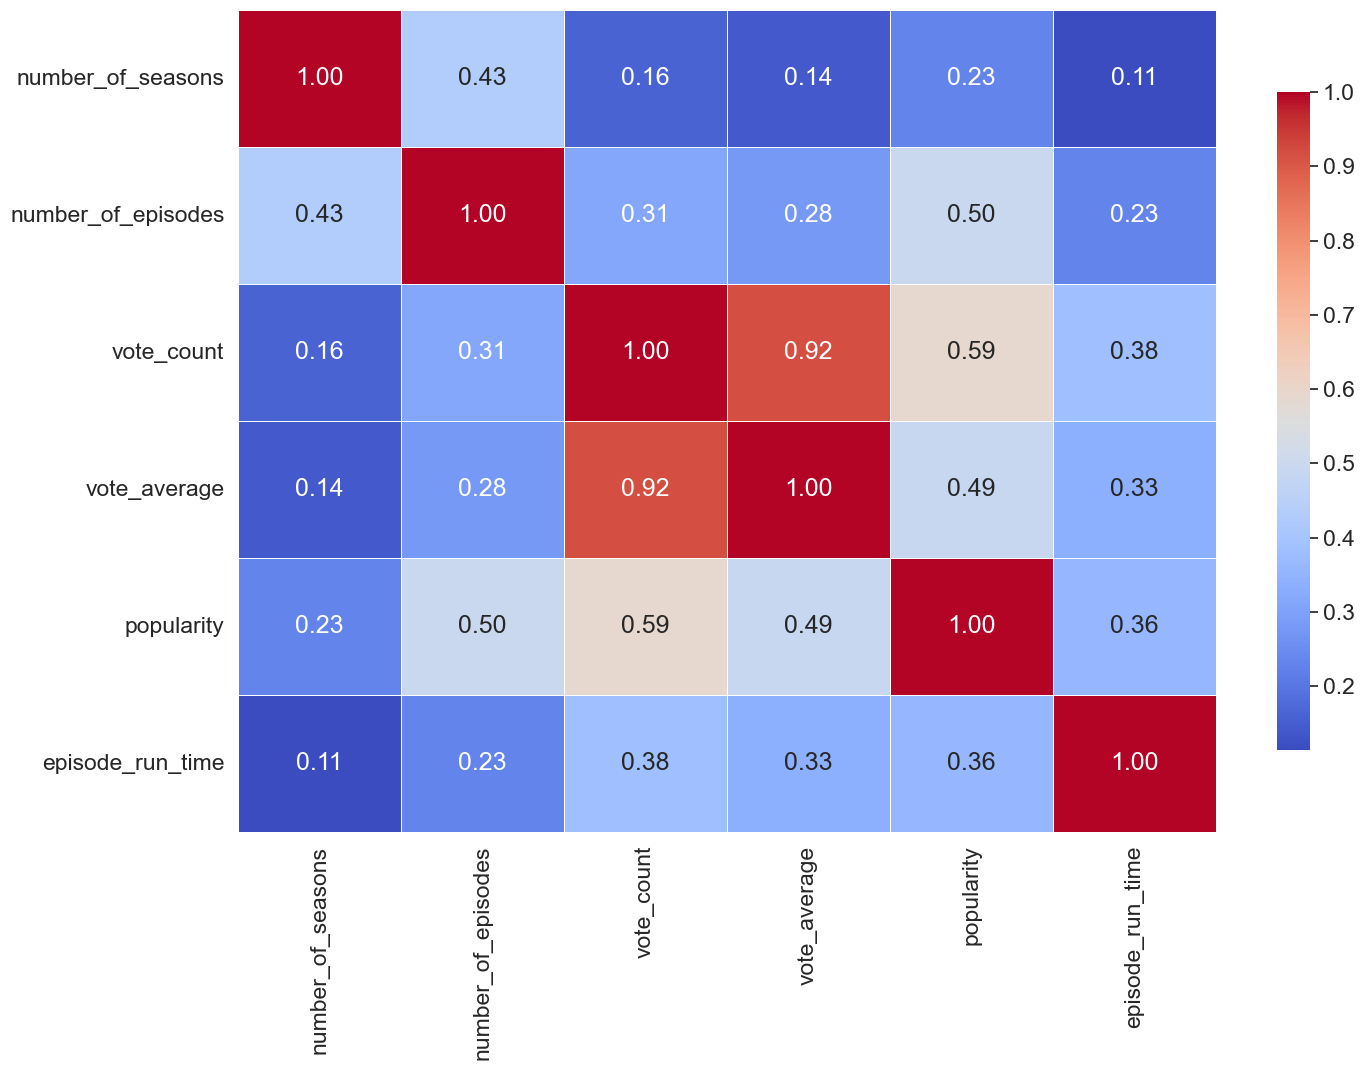

In [413]:
# Setting up the plot for the heatmap with a larger figure
plt.figure(figsize=(18, 14))  # Increased figure size for even more space

# Displaying the heatmap of the correlation matrix
sb.heatmap(correlation_matrix_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7, cbar_kws={"shrink": 0.8})

# Improving layout for more spacing
plt.tight_layout(pad=7.0)  # Increased padding for more space between elements

# Showing the plot
plt.show()

Conclusions:
*Very high correlation between "vote_count" and "vote_average" - makes sense.
*High correlation between the label "pupularity" and "vote_count", "vote_average" and "number of episodes".
*Medium-level correlation between "number_of_seasons" and "number_of_episodes" (quite obvious) and between "vote_count" and "episode_run_time" (intersting and not so predicted connection)

# Categorical Data 

In [416]:
# "type" and "status" features (low amount of categories compared to the allegdly others categorical ones)
cols_cat=['type','status']
cat_df = df2[cols_cat]
cat_df

,type,status
6,Scripted,Returning Series
9,Miniseries,Ended
12,Scripted,Returning Series
14,Scripted,Returning Series
16,Scripted,Returning Series
...,...,...
168591,Scripted,Returning Series
168624,Scripted,Returning Series
168630,Miniseries,Returning Series
168633,Scripted,Returning Series


In [417]:
plot_categorical = lambda col: sb.countplot(x=col, data=cat_df)

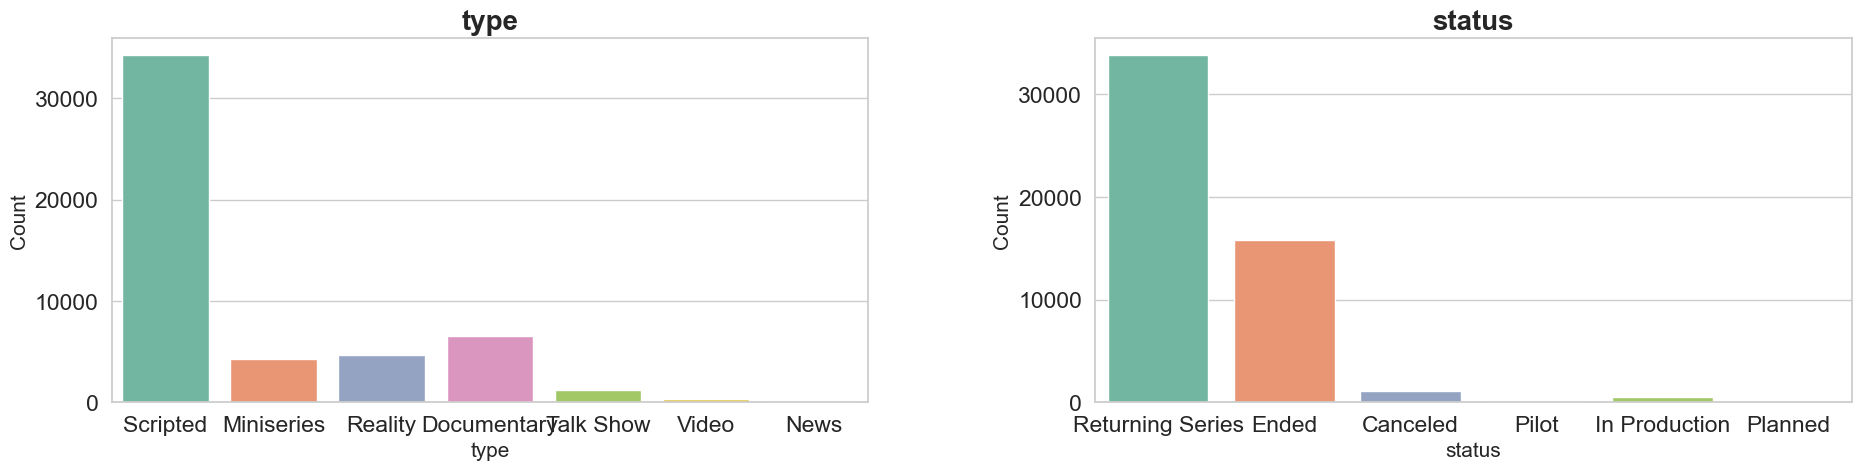

In [418]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(20, 18))  # Adjusting figure size
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjusting horizontal and vertical spacing
sb.set(style="whitegrid", font_scale=1.5)  # Setting the style and font scale

# Using a color palette like 'Set2' or 'coolwarm'
palette = sb.color_palette("Set2")

for i in cat_df.columns:  # Using columns of the dataframe
    plt.subplot(a, b, c)
    plt.title('{}'.format(i), fontsize=20, weight='bold')
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Count', fontsize=15)  # Add ylabel
    sb.countplot(data=cat_df, x=i, palette=palette)  # Applying palette
    c += 1

plt.show()

In [419]:
df_numeric.head()

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
6,2,9,13053,7.831,115.587,0.0
9,1,9,11308,8.300,62.893,0.0
12,2,12,10136,8.200,276.759,52.0
14,3,24,9353,8.500,154.480,0.0
16,2,16,9008,8.353,197.456,60.0


Pickle file

In [421]:
df2.to_pickle('df_after_eda1.pkl')